# Astra target landing site example

In [1]:
import astra
from astra.target_landing import targetFlight
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
targetLat = 28.33
targetLon = -79.8
targetElev = 0.

simulator = targetFlight(start_dateTime=datetime.now()+timedelta(days=1),
                 targetLat=targetLat,
                 targetLon=targetLon,
                 launchSites=[(29.2108, -81.0228, 4.)],
                 balloonGasType='Helium',
                 balloonModel='TA800',
                 nozzleLift=1,
                 inflationTemperature=0.0,
                 payloadTrainWeight=0.4,
                 windowDuration=24,
                 HD=False,
                 maxFlightTime=18000,
                 parachuteModel=None,
                 trainEquivSphereDiam=0.1,
                 floatingFlight=False,
                 floatingAltitude=None,
                 ventingStart=1000,
                 excessPressureCoeff=1.,
                 outputFile='',
                 debugging=False,
                 log_to_file=False,
                 progress_to_file=False)

best_result, distances_map = simulator.optimizeTargetLandingSite()

DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): nomads.ncep.noaa.gov
DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): nomads.ncep.noaa.gov
DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): nomads.ncep.noaa.gov
DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): nomads.ncep.noaa.gov
DEBUG:requests.packages.urllib3.connectionpool:http://nomads.ncep.noaa.gov:9090 "GET /dods/gfs_0p50/gfs20170518/gfs_0p50_12z.ascii?ugrdprs[10:19][0:46][227:249][511:605] HTTP/1.1" 200 486


DEBUG:requests.packages.urllib3.connectionpool:http://nomads.ncep.noaa.gov:9090 "GET /dods/gfs_0p50/gfs20170518/gfs_0p50_12z.ascii?tmpprs[10:19][0:46][227:249][511:605] HTTP/1.1" 200 486


DEBUG:requests.packages.urllib3.connectionpool:http://nomads.ncep.noaa.gov:9090 "GET /dods/gfs_0p50/gfs20170518/gfs_0p50_12z.ascii?hgtprs[10:19][0:46][227:249][511:605] HTTP/1.1" 200 486


DEBUG:requests.packages.urllib3.connectionpool:http://nomads.ncep.noaa.gov:9090 "GET /dods/gfs_0p50/gfs20170518/gfs_0p50_12z.ascii?vgrdprs[10:19][0:46][227:249][511:605] HTTP/1.1" 200 486


Weather downloaded.

DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): nomads.ncep.noaa.gov
DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): nomads.ncep.noaa.gov
DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): nomads.ncep.noaa.gov
DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): nomads.ncep.noaa.gov
DEBUG:requests.packages.urllib3.connectionpool:http://nomads.ncep.noaa.gov:9090 "GET /dods/gfs_0p50/gfs20170518/gfs_0p50_06z.ascii?tmpprs[12:21][0:46][227:249][511:605] HTTP/1.1" 200 None


DEBUG:requests.packages.urllib3.connectionpool:http://nomads.ncep.noaa.gov:9090 "GET /dods/gfs_0p50/gfs20170518/gfs_0p50_06z.ascii?ugrdprs[12:21][0:46][227:249][511:605] HTTP/1.1" 200 None


DEBUG:requests.packages.urllib3.connectionpool:http://nomads.ncep.noaa.gov:9090 "GET /dods/gfs_0p50/gfs20170518/gfs_0p50_06z.ascii?vgrdprs[12:21][0:46][227:249][511:605] HTTP/1.1" 200 None


DEBUG:requests.packages.urllib3.connectionpool:http://nomads.ncep.noaa.gov:9090 "GET /dods/gfs_0p50/gfs20170518/gfs_0p50_06z.ascii?hgtprs[12:21][0:46][227:249][511:605] HTTP/1.1" 200 None


Weather downloaded.


In [3]:
launch_datetime = datetime.now() + timedelta(days=1)
from astra.weather import forecastEnvironment
simEnvironment = forecastEnvironment(launchSiteLat=29.2108,      # deg
                                     launchSiteLon=-81.0228,     # deg
                                     launchSiteElev=4,           # m
                                     dateAndTime=launch_datetime,
                                     forceNonHD=True,
                                     debugging=True)
simulator.environment = simEnvironment
print(simulator.environment)

DEBUG:astra.weather:Fetched time zone data about the launch site: UTC offset is -4.000000 hours
DEBUG:astra.weather:Using UTC time 19/05/17 20:18
INFO:astra.weather:Preparing to download weather data for parameters:
DEBUG:astra.weather:    Launch site Latitude: 29.2108
DEBUG:astra.weather:    Launch site Longitude: -81.0228
DEBUG:astra.weather:    Launch time: 2017-05-19 20:18:17.628252
DEBUG:astra.GFS:Attempting to download cycle data.


DEBUG:astra.GFS:Requesting weather urls asynchronously: status will be sent to requests logger
DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): nomads.ncep.noaa.gov
DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): nomads.ncep.noaa.gov
DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): nomads.ncep.noaa.gov
DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): nomads.ncep.noaa.gov
DEBUG:requests.packages.urllib3.connectionpool:http://nomads.ncep.noaa.gov:9090 "GET /dods/gfs_0p50/gfs20170518/gfs_0p50_12z.ascii?hgtprs[10:13][0:46][232:244][546:570] HTTP/1.1" 200 487
DEBUG:astra.GFS:Updating Download progress: 25.0%% complete


DEBUG:requests.packages.urllib3.connectionpool:http://nomads.ncep.noaa.gov:9090 "GET /dods/gfs_0p50/gfs20170518/gfs_0p50_12z.ascii?vgrdprs[10:13][0:46][232:244][546:570] HTTP/1.1" 200 488
DEBUG:astra.GFS:Updating Download progress: 50.0%% complete


DEBUG:requests.packages.urllib3.connectionpool:http://nomads.ncep.noaa.gov:9090 "GET /dods/gfs_0p50/gfs20170518/gfs_0p50_12z.ascii?ugrdprs[10:13][0:46][232:244][546:570] HTTP/1.1" 200 488
DEBUG:astra.GFS:Updating Download progress: 75.0%% complete


DEBUG:requests.packages.urllib3.connectionpool:http://nomads.ncep.noaa.gov:9090 "GET /dods/gfs_0p50/gfs20170518/gfs_0p50_12z.ascii?tmpprs[10:13][0:46][232:244][546:570] HTTP/1.1" 200 487
DEBUG:astra.GFS:Updating Download progress: 100.0%% complete


Weather downloaded.


DEBUG:astra.GFS:Cycle not available.
DEBUG:astra.GFS:Moving to next cycle...
DEBUG:astra.GFS:Attempting to download cycle data.


DEBUG:astra.GFS:Requesting weather urls asynchronously: status will be sent to requests logger
DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): nomads.ncep.noaa.gov
DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): nomads.ncep.noaa.gov
DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): nomads.ncep.noaa.gov
DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): nomads.ncep.noaa.gov
DEBUG:requests.packages.urllib3.connectionpool:http://nomads.ncep.noaa.gov:9090 "GET /dods/gfs_0p50/gfs20170518/gfs_0p50_06z.ascii?hgtprs[12:15][0:46][232:244][546:570] HTTP/1.1" 200 None
DEBUG:astra.GFS:Updating Download progress: 25.0%% complete


DEBUG:requests.packages.urllib3.connectionpool:http://nomads.ncep.noaa.gov:9090 "GET /dods/gfs_0p50/gfs20170518/gfs_0p50_06z.ascii?tmpprs[12:15][0:46][232:244][546:570] HTTP/1.1" 200 None
DEBUG:astra.GFS:Updating Download progress: 50.0%% complete


DEBUG:requests.packages.urllib3.connectionpool:http://nomads.ncep.noaa.gov:9090 "GET /dods/gfs_0p50/gfs20170518/gfs_0p50_06z.ascii?ugrdprs[12:15][0:46][232:244][546:570] HTTP/1.1" 200 None
DEBUG:astra.GFS:Updating Download progress: 75.0%% complete


DEBUG:requests.packages.urllib3.connectionpool:http://nomads.ncep.noaa.gov:9090 "GET /dods/gfs_0p50/gfs20170518/gfs_0p50_06z.ascii?vgrdprs[12:15][0:46][232:244][546:570] HTTP/1.1" 200 None
DEBUG:astra.GFS:Updating Download progress: 100.0%% complete


Weather downloaded.


DEBUG:astra.GFS:Forecast successfully downloaded!
DEBUG:astra.weather:GFS data successfully downloaded.


<IPython.core.display.Javascript object>


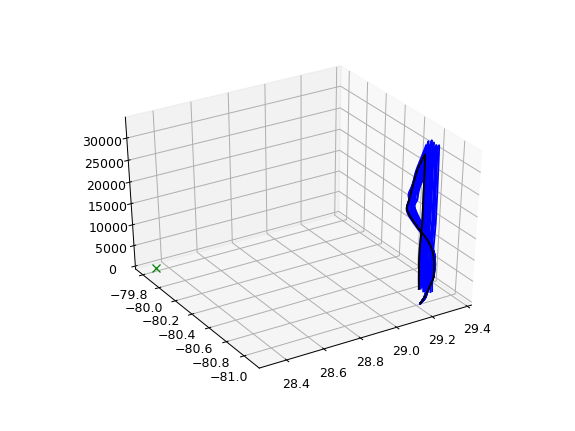

<IPython.core.display.Javascript object>


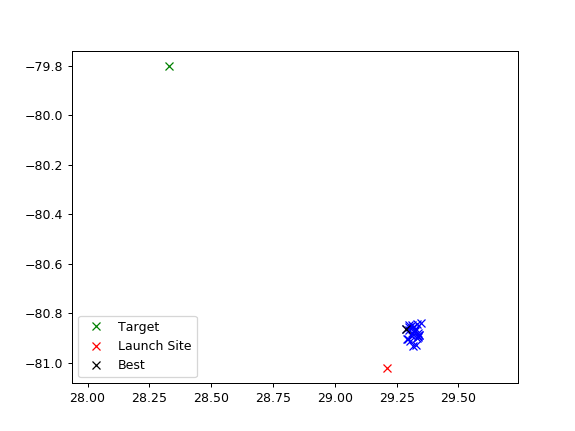

In [4]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)


plt.axis('equal')

for result_dict in simulator.results:
    result = result_dict['result']
    lat_arr, lon_arr, alt_arr = result[2:5]
    ax1.plot(lat_arr, lon_arr, alt_arr, 'b-')
    ax2.plot(lat_arr[-1], lon_arr[-1], 'bx')
    
best_lat, best_lon, best_alt = best_result[0]['result'][2:5]
ax2.plot(targetLat, targetLon, 'gx', label='Target')
ax2.plot(simulator.launchSites[0][0], simulator.launchSites[0][1], 'rx', label='Launch Site')
ax2.plot(best_lat[-1], best_lon[-1], 'kx', label='Best')
    
ax1.plot(best_lat, best_lon, best_alt, 'k-', label='Best')
ax1.plot([targetLat], [targetLon], [targetElev], 'gx', label='target')

ax2.legend(loc='lower left')